In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [38]:
cars = pd.read_csv("mtcars.csv")

In [39]:
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [40]:
cars.shape

(32, 12)

In [41]:
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [42]:
#car is automatic or Manual   am as my target/dependent/y
# Using predictor variables/ features/ independent variabes, x1, x2, x3,... => X
y = cars.am
X = cars.loc[:,['mpg','hp','wt']]

In [43]:
model_logr = LogisticRegression()

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=10)

In [45]:
X_train.shape

(22, 3)

In [46]:
X_test.shape

(10, 3)

In [47]:
model_logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_predict = model_logr.predict(X_test)

In [49]:
y_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [50]:
y_test

20    0
7     0
5     0
2     1
3     0
21    0
13    0
28    1
12    0
1     1
Name: am, dtype: int64

In [51]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       1.00      0.86      0.92         7
          1       0.75      1.00      0.86         3

avg / total       0.93      0.90      0.90        10



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,y_predict)

array([[6, 1],
       [0, 3]])

In [54]:
#Second example student exam set, Number of study and whether student pass or fail in the exam.

In [55]:
student_exam = pd.read_csv('pass.csv')

In [56]:
student_exam.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [57]:
student_exam.shape

(29, 2)

In [58]:
X2 = student_exam.Hours.reshape(-1,1)
y2 = student_exam.Pass

/Users/ashok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=.3, random_state=10)

In [60]:
X_train2.shape

(20, 1)

In [61]:
model_logr2 = LogisticRegression(C=1e5)

In [62]:
model_logr2.fit(X_train2,y_train2)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_predict2 = model_logr2.predict(X_test2)

In [64]:
confusion_matrix(y_test2,y_predict2)

array([[5, 1],
       [0, 3]])

In [65]:
print(classification_report(y_test2,y_predict2))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.75      1.00      0.86         3

avg / total       0.92      0.89      0.89         9



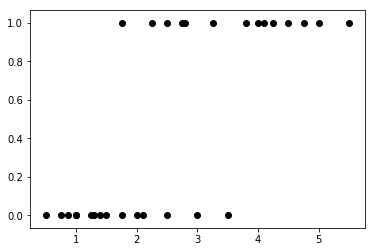

In [66]:
plt.scatter(X2,y2, color='black')

In [67]:
X_test_ran = np.linspace(0,6,200)

In [68]:
# p(y) = 1 / (1 + exp(1(ax+b)))

def model(x):
    return ( 1/(1+np.exp(-x)))
loss = model(X_test_ran*model_logr2.coef_+ model_logr2.intercept_).ravel()



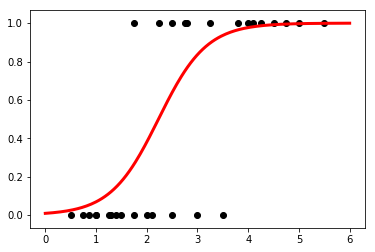

In [69]:
plt.plot(X_test_ran,loss,color='red',linewidth=3)
plt.scatter(X2,y2, color='black')

In [70]:
model_logr2.coef_

array([[2.1172351]])

In [71]:
model_logr2.intercept_

array([-4.72417852])